## Image Color Segmentation (with HSV)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from typing import Tuple


In [85]:
def image_color_summarizer(rgb_img: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    hsv_img = rgb2hsv(rgb_img)
    return (hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2])


In [86]:
from skimage import data
# get coffee image for testing
COFFEE = data.coffee()
hue, saturation, value = image_color_summarizer(COFFEE)

Text(0.5, 1.0, 'Value')

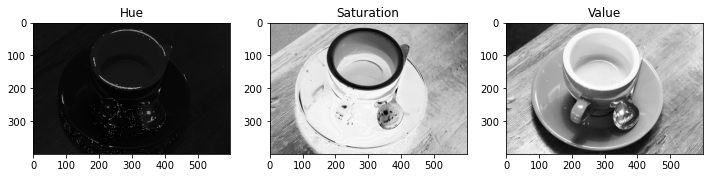

In [87]:
# Understanding Hue, Saturation, and Value
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value')

## Face Detection

In [88]:
from skimage import data
from skimage import feature

import matplotlib.pyplot as plt
from matplotlib import patches

In [89]:
def detect_faces(img: np.ndarray) -> plt.Axes:
    # Load the trained file from the module root.
    trained_file = data.lbp_frontal_face_cascade_filename()
    # Initialize the detector cascade.
    detector = feature.Cascade(trained_file)
    detected = detector.detect_multi_scale(img=img,
                                           scale_factor=1.2,
                                           step_ratio=1,
                                           min_size=(60, 60),
                                           max_size=(123, 123))
    face_rectangles = []
    for rectangle in detected:
        face_rectangle = {
            "x": rectangle['c'],
            "y": rectangle['r'],
            "width": rectangle['width'],
            "height": rectangle['height'],
        }
        face_rectangles.append(face_rectangle)

    return face_rectangles


In [90]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()
img = data.astronaut()
face_rectangles = detect_faces(img)

## Next Steps

## We've established we can detect faces and we can rate an image's hue, saturation, and value. 

Let's check out HSV on the face image.

In [91]:
# Crop everything out but the face.
def crop(face_rectangle, img: np.ndarray):
    x0 = face_rectangle["x"]
    y0 = face_rectangle["y"]
    width = face_rectangle["width"]
    height = face_rectangle["height"]
    return img[y0:y0+height , x0:x0+width, :]



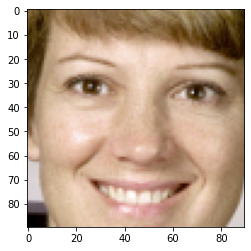

In [92]:
new_img = crop(face_rectangles[0], img)
plt.imshow(new_img)

In [97]:
"""Identifies color season for an individual's profile."""
from typing import Tuple
import numpy as np

COLOR_SEASON_DICT = {
    # spring
    ("bright", "warm"): "bright spring",
    ("warm", "bright"): "true spring",
    ("light", "warm"): "light spring",
    # summer
    ("light", "cool"): "light summer",
    ("cool", "muted"): "true summer",
    ("muted", "cool"): "soft summer",
    # autumn
    ("muted", "warm"): "soft autumn",
    ("warm", "muted"): "true autumn",
    ("dark", "warm"): "dark autumn",
    # winter
    ("dark", "cool"): "dark winter",
    ("cool", "bright"): "true winter",
    ("bright", "cool"): "bright winter"
}


def match_characteristics_to_season(primary_characteristic: str,
                                    secondary_characteristic: str) -> str:
    return COLOR_SEASON_DICT[
        (primary_characteristic, secondary_characteristic)]


def get_primary_and_secondary_characteristics(
        hue: np.ndarray, sat: np.ndarray, val: np.ndarray
) -> Tuple[str, str]:
    return ("warm", "muted")


def identify_color_season(img: np.ndarray):
    faces = detect_faces(img)
    face = crop(faces[0], img)

    hue, sat, val = image_color_summarizer(face)
    print(type(hue))
    print(type(sat))
    print(type(val))
    primary, secondary = get_primary_and_secondary_characteristics(
        hue, sat, val)
    color_season = match_characteristics_to_season(primary, secondary)

    return ((hue, sat, val), color_season)

In [98]:
img = data.astronaut()

hsv, color_season = identify_color_season(img)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Value')

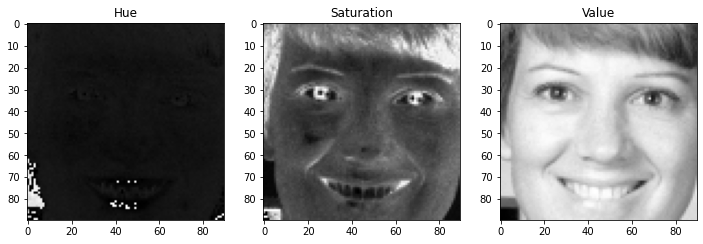

In [99]:
# Understanding Hue, Saturation, and Value
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(hsv[0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(hsv[1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(hsv[2], cmap='gray')
ax[2].set_title('Value')